Only individuals with Beijing license plates are allowed to drive within city limits. The intent of the policy is to limit traffic and pollution in Beijing. Since January 2011, the government has held lotteries to distribute these license plates. Therefore, those awarded the license plate comprise a random sample of applicants; and by extension, lottery winners are a random subset of car buyers.

Daljord et al. (2021) theorizes there is a black market for license plates. Since the license plates were valuable, lottery winners sometimes sell the license plates to wealthy people. This would result in a larger share of wealthy individuals obtaining license plates. Policymakers would like to know the scale of this black market, but have traditionally been unable to do so because the transactions are under the radar.

However, we know a likely outcome of this black market: if lower income people are selling their license plates to wealthier people, we would expect that more expensive cars will be sold than we would expect based on parallel trends in other cities.

That is precisely the analysis I carry out. I use the Diftrans package (https://github.com/omkarakatta/diftrans) to compare the distribution of car prices in Beijing to that in Tianjin. The result 

is a method that compares two distributions and quantifies the difference between them. This difference is referred to as the "transport cost" -- as in the "cost" needed to "transport" the mass of one distribution to make its shape match with another. Diftrans attempts to find the minimal cost neeeded to transport the mass of one distribution such that it has the same shape as another distribution. It also corrects for trends over time, similar to a difference-in-differences estimator.

My analysis finds strong evidence that the theorized black market is real, and finds a lower bound for its size.

In [188]:
from r_wrapper import diftrans
import pandas as pd # for manipulating data
import numpy as np # for numeric operations
from matplotlib import pyplot as plt # for visualization
from r_wrapper import base
from r_wrapper import stats
import seaborn as sns

In [189]:
Beijing_sample = base.get("Beijing_sample")
Tianjin_sample = base.get("Tianjin_sample")

Beijing = Beijing_sample[(Beijing_sample["year"] >= 2010) &
                        (Beijing_sample["year"] < 2012)]

Tianjin = Tianjin_sample[(Tianjin_sample["year"] >= 2010) &
                        (Beijing_sample["year"] < 2012)]

<ipython-input-189-dab41ab00d8c>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Tianjin = Tianjin_sample[(Tianjin_sample["year"] >= 2010) &


2010 Beijing Data

In [207]:
# collect unique MSRP values
uniqueMSRP = pd.DataFrame(Beijing.MSRP.unique()).rename(columns={0:"MSRP"})

# aggregate sales at each price for 2010 (pre-lottery)
Beijing10_sales = Beijing[(Beijing['year'] == 2010)].groupby('MSRP').aggregate({'sales':[sum]}) 

Beijing10_sales = Beijing10_sales.unstack().reset_index().rename_axis(None, axis=1)

Beijing10_sales = Beijing10_sales.drop(columns=['level_0', 'level_1']).rename(columns={0:'count'})
http://localhost:8888/notebooks/Documents/Machine%20Learning/HW/Lab%20HW%202/Supervised%20Machine%20Learning%20-%20Causal%20Inference%20with%20Beijing%20Car%20Sales.ipynb#
# merge the MSRP and sales
Beijing_pre = uniqueMSRP.merge(Beijing10_sales, how="left", on = "MSRP")

Beijing_pre[["count"]] = Beijing_pre[["count"]].fillna(value=0)

Beijing_pre = Beijing_pre.sort_values("MSRP")
Beijing_pre.head()

,MSRP,count
482,20800,0.0
374,29800,47.0
338,32900,3153.0
227,33800,3678.0
388,34800,592.0


2011 Beijing Data

In [208]:
# collect unique MSRP values
uniqueMSRP = pd.DataFrame(Beijing.MSRP.unique()).rename(columns={0:"MSRP"})

# aggregate sales at each price for 2011 (post-lottery)
Beijing11_sales = Beijing[(Beijing['year'] == 2011)].groupby('MSRP').aggregate({'sales':[sum]}) 

Beijing11_sales = Beijing11_sales.unstack().reset_index().rename_axis(None, axis=1)

Beijing11_sales = Beijing11_sales.drop(columns=['level_0', 'level_1']).rename(columns={0:'count'})

# merge the MSRP and sales
Beijing_post = uniqueMSRP.merge(Beijing11_sales, how="left", on = "MSRP")

Beijing_post[["count"]] = Beijing_post[["count"]].fillna(value=0)

Beijing_post = Beijing_post.sort_values("MSRP")
Beijing_post.head()

,MSRP,count
482,20800,23.0
374,29800,0.0
338,32900,1393.0
227,33800,4.0
388,34800,189.0


2010 Tianjin car sales

In [209]:
# collect unique MSRP values
uniqueMSRP = pd.DataFrame(Tianjin.MSRP.unique()).rename(columns={0:"MSRP"})

# aggregate sales at each price for 2010 (pre-lottery)
Tianjin10_sales = Tianjin[(Tianjin['year'] == 2010)].groupby('MSRP').aggregate({'sales':[sum]}) 

Tianjin10_sales = Tianjin10_sales.unstack().reset_index().rename_axis(None, axis=1)

Tianjin10_sales = Tianjin10_sales.drop(columns=['level_0', 'level_1']).rename(columns={0:'count'})

# merge the MSRP and sales
Tianjin_pre = uniqueMSRP.merge(Tianjin10_sales, how="left", on = "MSRP")

Tianjin_pre[["count"]] = Tianjin_pre[["count"]].fillna(value=0)

Tianjin_pre = Tianjin_pre.sort_values("MSRP")
Tianjin_pre.head()

,MSRP,count
448,20800,0.0
464,28800,0.0
358,29800,51.0
494,30900,0.0
327,32900,599.0


2011 Tianjin car sales

In [210]:
# collect unique MSRP values
uniqueMSRP = pd.DataFrame(Tianjin.MSRP.unique()).rename(columns={0:"MSRP"})

# aggregate sales at each price for 2011 (pre-lottery)
Tianjin11_sales = Tianjin[(Tianjin['year'] == 2011)].groupby('MSRP').aggregate({'sales':[sum]}) 

Tianjin11_sales = Tianjin11_sales.unstack().reset_index().rename_axis(None, axis=1)

Tianjin11_sales = Tianjin11_sales.drop(columns=['level_0', 'level_1']).rename(columns={0:'count'})

# merge the MSRP and sales
Tianjin_post = uniqueMSRP.merge(Tianjin11_sales, how="left", on = "MSRP")

Tianjin_post[["count"]] = Tianjin_post[["count"]].fillna(value=0)

Tianjin_post = Tianjin_post.sort_values("MSRP")
Tianjin_post.head()

,MSRP,count
448,20800,23.0
464,28800,7.0
358,29800,5.0
494,30900,1.0
327,32900,948.0


In [211]:
# uncount
df2 = Beijing_pre.pop("count")
Beijing_distribution_pre = pd.DataFrame(Beijing_pre.values.repeat(df2, axis=0), columns=Beijing_pre.columns)

In [212]:
df3 = Beijing_post.pop("count")
Beijing_distribution_post = pd.DataFrame(Beijing_post.values.repeat(df3, axis=0), columns=Beijing_post.columns)

No handles with labels found to put in legend.


(0.0, 1200.0)

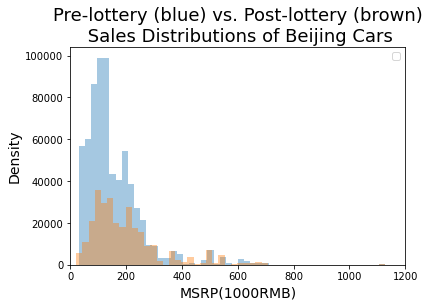

In [213]:
fig, ax = plt.subplots()
for a in [Beijing_distribution_pre, Beijing_distribution_post]:
    sns.distplot(a/1000, ax=ax, kde=False)
plt.xlabel("MSRP(1000RMB)", size=14)
plt.ylabel("Density", size=14)
plt.title("Pre-lottery (blue) vs. Post-lottery (brown)\n Sales Distributions of Beijing Cars", size=18)
plt.legend(loc='upper right')
ax.set_xlim([0, 1200])

In [214]:
# uncount
df2 = Tianjin_pre.pop("count")
Tianjin_distribution_pre = pd.DataFrame(Tianjin_pre.values.repeat(df2, axis=0), columns=Tianjin_pre.columns)

df3 = Tianjin_post.pop("count")
Tianjin_distribution_post = pd.DataFrame(Tianjin_post.values.repeat(df3, axis=0), columns=Tianjin_post.columns)

No handles with labels found to put in legend.


(0.0, 1200.0)

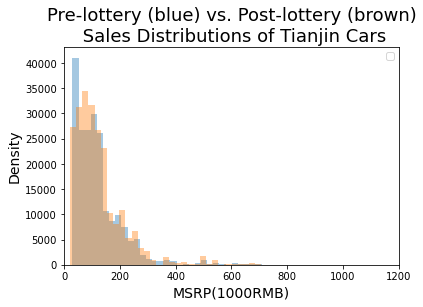

In [215]:
fig, ax = plt.subplots()
for a in [Tianjin_distribution_pre, Tianjin_distribution_post]:
    sns.distplot(a/1000, ax=ax, kde=False)
plt.xlabel("MSRP(1000RMB)", size=14)
plt.ylabel("Density", size=14)
plt.title("Pre-lottery (blue) vs. Post-lottery (brown)\n Sales Distributions of Tianjin Cars", size=18)
plt.legend(loc='upper right')
ax.set_xlim([0, 1200])

In Tianjin, it doesn't seem like there was a big shift in the price distribution of cars sold between 2010 and 2011. This is very different from the story in Beijing, where the distribution of cars shifted dramatically away from low price cars and towards expensive cars. If we think Tianjin is a comparable city to Beijing, this is a surprise. It is consistent with the idea that the introduction of the lottery, which happened in Beijing but not Tianjin, might have produced the difference in pre/post sales price distributions.

Computing Before-and-After Estimator

Text(0, 0.5, 'Density')

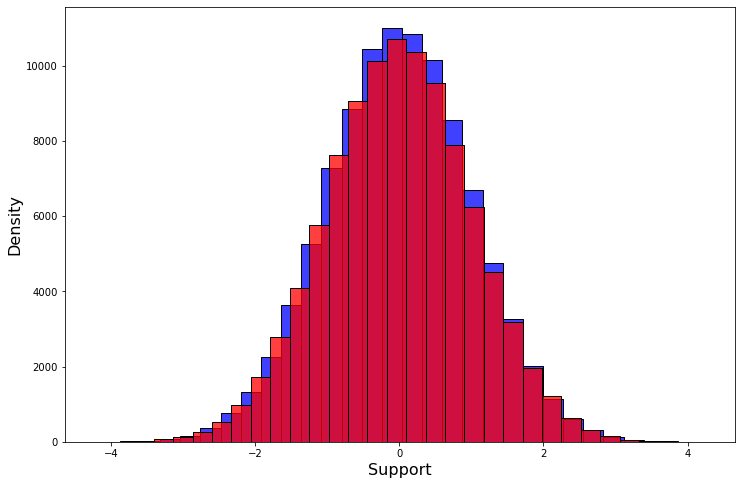

In [217]:
n_observations = 100000
sample1 = np.random.normal(0, 1, n_observations)
sample2 = np.random.normal(0, 1, n_observations)

plt.figure(figsize=(12,8))
sns.histplot(data = sample1, bins = 30, color = 'blue')
sns.histplot(data = sample2, bins = 30, color = 'red')
plt.xlabel("Support", size=16)
plt.ylabel("Density", size=16)

In [238]:
base.set_seed(1)

Beijing_pre = uniqueMSRP.merge(Beijing10_sales, how="left", on = "MSRP")
Beijing_pre[["count"]] = Beijing_pre[["count"]].fillna(value=0)
Beijing_pre = Beijing_pre.sort_values("MSRP")

count =  stats.rmultinom(n = 1, size = sum(Beijing_pre["count"]), prob = Beijing_pre['count'])
count2 = count[:,0]

d = {"MSRP": Beijing_pre["MSRP"], "count" : count2}
placebo_1 = pd.DataFrame(data=d)

print(placebo_1)
print(placebo_1.dtypes)

        MSRP  count
448    20800      0
464    28800      0
358    29800     50
494    30900      0
327    32900   3136
..       ...    ...
552   799000      0
426   800400      0
542   998000      2
539  1019000      0
237  1127800    322

[567 rows x 2 columns]
MSRP     int64
count    int32
dtype: object


In [247]:
Beijing_post = uniqueMSRP.merge(Beijing11_sales, how="left", on = "MSRP")
Beijing_post[["count"]] = Beijing_post[["count"]].fillna(value=0)
Beijing_post = Beijing_post.sort_values("MSRP")

count =  stats.rmultinom(n = 1, size = sum(Beijing_post["count"]), prob = Beijing_pre['count'])
count2 = count[:,0]

d = {"MSRP": Beijing_post["MSRP"], "count" : count2}
placebo_2 = pd.DataFrame(data=d)
print(placebo_2)
print(placebo_2.dtypes)

        MSRP  count
448    20800      0
464    28800      0
358    29800     21
494    30900      0
327    32900   1315
..       ...    ...
552   799000      0
426   800400      1
542   998000      1
539  1019000      0
237  1127800    135

[567 rows x 2 columns]
MSRP     int64
count    int32
dtype: object


The two placebo datasets appear to be drawn from the same distribution, despite some small variations. The distribution of placebo 2 looks like a vertically shrunk version of that of placebo 1.

No handles with labels found to put in legend.


(0.0, 1200.0)

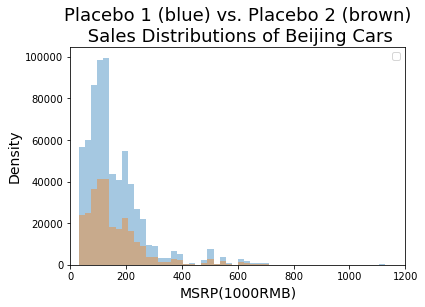

In [248]:
# uncount
placebo_1_uncount_transition = placebo_1.copy()
df2 = placebo_1_uncount_transition.pop("count")
placebo_1_distribution = pd.DataFrame(placebo_1_uncount_transition.values.repeat(df2, axis=0), columns=placebo_1_uncount_transition.columns)


placebo_2_uncount_transition = placebo_2.copy()
df2 = placebo_2_uncount_transition.pop("count")
placebo_2_distribution = pd.DataFrame(placebo_2_uncount_transition.values.repeat(df2, axis=0), columns=placebo_2_uncount_transition.columns)


fig, ax = plt.subplots()
for a in [placebo_1_distribution, placebo_2_distribution]:
    sns.distplot(a/1000, ax=ax, kde=False)
plt.xlabel("MSRP(1000RMB)", size=14)
plt.ylabel("Density", size=14)
plt.title("Placebo 1 (blue) vs. Placebo 2 (brown)\n Sales Distributions of Beijing Cars", size=18)
plt.legend(loc='upper right')
ax.set_xlim([0, 1200])

In [249]:
placebo_at_0 = diftrans.diftrans(pre_main = placebo_1, post_main = placebo_2, bandwidth_seq = 0)
# The transport cost for the specified bandwidths have been computed
print(placebo_at_0 )


R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.



   bandwidth      main
1          0  0.014807


In [250]:
df = {"d":range(0, 100001, 1000)}
transport_costs = pd.DataFrame(df)
transport_costs = diftrans.diftrans(pre_main = placebo_1, post_main = placebo_2, bandwidth_seq = transport_costs["d"])
transport_costs

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.



,bandwidth,main
0,0,0.014807
1,1000,0.006956
2,2000,0.003792
3,3000,0.002247
4,4000,0.002233
...,...,...
96,96000,0.000004
97,97000,0.000004
98,98000,0.000004
99,99000,0.000004


No handles with labels found to put in legend.


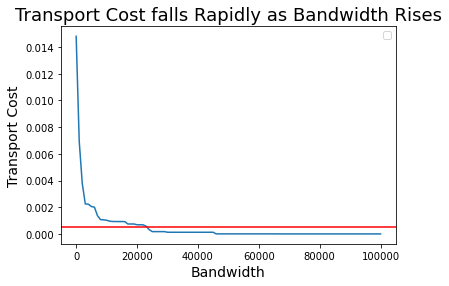

In [251]:
sns.lineplot(data = transport_costs, x = "bandwidth", y = "main")
plt.axhline(0.0005, color = "r")
plt.xlabel("Bandwidth", size=14)
plt.ylabel("Transport Cost", size=14)
plt.title("Transport Cost falls Rapidly as Bandwidth Rises", size=18)
plt.legend(loc='upper right')

d. For which values of 𝑑 is the placebo cost less than 0.05%?

$$d\geq24,000$$

In [252]:
transport_costs[transport_costs["main"] < 0.0005].sort_values("bandwidth").head()

,bandwidth,main
24,24000,0.000320
25,25000,0.000176
26,26000,0.000176
27,27000,0.000176
28,28000,0.000176


e. For the smallest value of 𝑑 found in the previous step, what is the empirical transport cost? This estimate for the lower bound on the volume of black market transactions is what we call the before-and-after estimate.

The Beijing before-and-after estimate is 0.105395

In [253]:
Beijing_at_0 = diftrans.diftrans(pre_main = Beijing_pre, post_main = Beijing_post, bandwidth_seq = 24000)
# The transport cost for the specified bandwidths have been computed
print(Beijing_at_0 )

R[write to console]: Computing Transport Costs...



R[write to console]: The transport cost for the specified bandwidths have been computed.



   bandwidth      main
1      24000  0.105395


In [254]:
Tianjin_pre = uniqueMSRP.merge(Tianjin10_sales, how="left", on = "MSRP")
Tianjin_pre[["count"]] = Tianjin_pre[["count"]].fillna(value=0)
Tianjin_pre = Tianjin_pre.sort_values("MSRP")

Tianjin_post = uniqueMSRP.merge(Tianjin11_sales, how="left", on = "MSRP")
Tianjin_post[["count"]] = Tianjin_post[["count"]].fillna(value=0)
Tianjin_post = Tianjin_post.sort_values("MSRP")

In [255]:
dit_at_0 = diftrans.diftrans(pre_main = Beijing_pre,
    post_main = Beijing_post,
    pre_control = Tianjin_pre,
    post_control = Tianjin_post,
    bandwidth_seq = 0,
    conservative = True)
print(dit_at_0)

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.0543824077953536 at d = 0



   bandwidth      main    main2d   control      diff    diff2d
1          0  0.353063  0.353063  0.298681  0.054382  0.054382


3.5.a) Compute the (3) for different values of 𝑑 from 0 to 50,000. Unlike before, we go up to 50,000 because we are using the conservative bandwidth of 2𝑑 for the Beijing transport cost.

In [229]:
df = {"d":range(0, 50001, 1000)}
transport_costs_empirical = pd.DataFrame(df)
transport_costs_empirical = diftrans.diftrans(pre_main = Beijing_pre,
    post_main = Beijing_post,
    pre_control = Tianjin_pre,
    post_control = Tianjin_post,
    bandwidth_seq = transport_costs_empirical["d"],
    conservative = True)
transport_costs_empirical

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.120098805809769 at d = 7000



,bandwidth,main,main2d,control,diff,diff2d
0,0,0.353063,0.353063,0.298681,0.054382,0.054382
1,1000,0.258917,0.217717,0.177321,0.081596,0.040396
2,2000,0.217717,0.184918,0.113613,0.104104,0.071305
3,3000,0.202557,0.173305,0.083447,0.119110,0.089859
4,4000,0.184918,0.167482,0.065552,0.119367,0.101930
5,5000,0.177857,0.151889,0.045617,0.132241,0.106272
6,6000,0.173305,0.148383,0.039409,0.133896,0.108973
7,7000,0.169677,0.145293,0.025194,0.144482,0.120099
8,8000,0.167482,0.132394,0.024618,0.142864,0.107776
9,9000,0.161798,0.125137,0.023744,0.138054,0.101393


In [256]:
count =  stats.rmultinom(n = 1, size = sum(Beijing_pre["count"]), prob = Beijing_pre['count'])
count2 = count[:,0]

d = {"MSRP": Beijing_pre["MSRP"], "count" : count2}
placebo_Beijing_1 = pd.DataFrame(data=d)

In [257]:
count =  stats.rmultinom(n = 1, size = sum(Beijing_post["count"]), prob = Beijing_pre['count'])
count2 = count[:,0]

d = {"MSRP": Beijing_pre["MSRP"], "count" : count2}
placebo_Beijing_2 = pd.DataFrame(data=d)

In [232]:
count =  stats.rmultinom(n = 1, size = sum(Tianjin_pre["count"]), prob = Tianjin_pre['count'])
count2 = count[:,0]

d = {"MSRP": Tianjin_pre["MSRP"], "count" : count2}
placebo_Tianjin_1 = pd.DataFrame(data=d)

In [233]:
count =  stats.rmultinom(n = 1, size = sum(Tianjin_post["count"]), prob = Tianjin_pre['count'])
count2 = count[:,0]

d = {"MSRP": Tianjin_pre["MSRP"], "count" : count2}
placebo_Tianjin_2 = pd.DataFrame(data=d)

In [258]:
df = {"d":range(0, 50001, 1000)}
transport_costs = pd.DataFrame(df)
transport_costs = diftrans.diftrans(pre_main = placebo_Beijing_1,
    post_main = placebo_Beijing_2,
    pre_control = placebo_Tianjin_1,
    post_control = placebo_Tianjin_2,
    bandwidth_seq = transport_costs["d"],
    conservative = True)
transport_costs

R[write to console]: Computing Differences-in-Transports Estimator...

R[write to console]: Note: you are using `conservative = T`.



R[write to console]: The conservative diff-in-transports estimator is 0.000349529920811857 at d = 11000



,bandwidth,main,main2d,control,diff,diff2d
0,0,0.014097,0.014097,0.018814,-0.004717,-4.716591e-03
1,1000,0.005916,0.002879,0.006720,-0.000803,-3.840593e-03
2,2000,0.002879,0.001958,0.004063,-0.001184,-2.104901e-03
3,3000,0.002117,0.001409,0.003698,-0.001581,-2.288961e-03
4,4000,0.001958,0.001245,0.003436,-0.001478,-2.190436e-03
5,5000,0.001439,0.001245,0.002204,-0.000765,-9.585497e-04
6,6000,0.001409,0.001088,0.002159,-0.000750,-1.071066e-03
7,7000,0.001275,0.001058,0.001051,0.000224,7.242549e-06
8,8000,0.001245,0.001055,0.000989,0.000256,6.552658e-05
9,9000,0.001245,0.001039,0.000737,0.000509,3.019374e-04


No handles with labels found to put in legend.


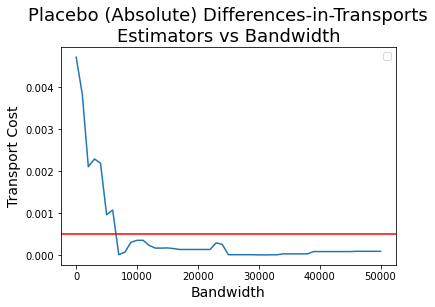

In [259]:
transport_costs["abs_diff2d"] = abs(transport_costs["diff2d"]) 

sns.lineplot(data = transport_costs, x = "bandwidth", y = "abs_diff2d")
plt.axhline(0.0005, color = "r")
plt.xlabel("Bandwidth", size=14)
plt.ylabel("Transport Cost", size=14)
plt.title("Placebo (Absolute) Differences-in-Transports\nEstimators vs Bandwidth", size=18)
plt.legend(loc='upper right')

The absolute value of the placebo differences-in-transports estimator stays below 0.05% when:

$$d\geq7,000$$

In [260]:
transport_costs[transport_costs["abs_diff2d"] < 0.0005].sort_values("bandwidth").head()

,bandwidth,main,main2d,control,diff,diff2d,abs_diff2d
7,7000,0.001275,0.001058,0.001051,0.000224,0.000007,0.000007
8,8000,0.001245,0.001055,0.000989,0.000256,0.000066,0.000066
9,9000,0.001245,0.001039,0.000737,0.000509,0.000302,0.000302
10,10000,0.001245,0.001039,0.000689,0.000556,0.000350,0.000350
11,11000,0.001088,0.001039,0.000689,0.000399,0.000350,0.000350


The d value that yields the largest value of (3) is 7,000, yielding a diff2d of 0.12.

In [261]:
transport_costs_empirical[transport_costs_empirical["bandwidth"]>=7000].sort_values("diff2d", ascending = False).head()

,bandwidth,main,main2d,control,diff,diff2d
7,7000,0.169677,0.145293,0.025194,0.144482,0.120099
8,8000,0.167482,0.132394,0.024618,0.142864,0.107776
10,10000,0.151889,0.123232,0.020093,0.131796,0.103138
9,9000,0.161798,0.125137,0.023744,0.138054,0.101393
11,11000,0.148412,0.116833,0.019650,0.128762,0.097183
